# Report on Aldine ISD


In [28]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi
import pandas as pd 
import sys

In [29]:
os.chdir("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")
# Add the directory to sys.path so Python knows where to find the Demographic_Buckets module
sys.path.append("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")

from KNN_Diagnostic_Plots import plot_economically_disadvantaged_side_by_side, plot_language_education_bars, plot_gifted_talented_bars, plot_special_ed_504_bar, plot_race_ethnicity_stacked_bar, plot_student_teacher_ratio_bars, plot_student_staff_counts, plot_special_populations_bar

from getData import get_data

from compareNeighbors import comparePlotter, compareMetrics

from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import student_teacher_ratio

In [30]:
os.chdir("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")

# Read the CSV files
df = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.7Master_Files/Individual Year Files_Take2/merged_2023.csv")
distgrad = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.6Data2023/District/clean_data/distgrad_2023_clean.csv")
distprof = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.6Data2023/District/clean_data/distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)

AldineISD =  101902 

In [31]:
all_neighbors = compareMetrics(district_id = AldineISD, df = df)

In [32]:
pd.DataFrame({'Unique Neighbors': all_neighbors['DISTNAME'][all_neighbors['DISTRICT_id'] != AldineISD].unique()})

,Unique Neighbors
0,HEMPSTEAD ISD
1,SHELDON ISD
2,DALLAS ISD
3,FORT WORTH ISD
4,HOUSTON ISD
5,BAY CITY ISD
6,ROYAL ISD
7,MANOR ISD
8,GRAND PRAIRIE ISD
9,EVERMAN ISD


## Economically Disadvantaged

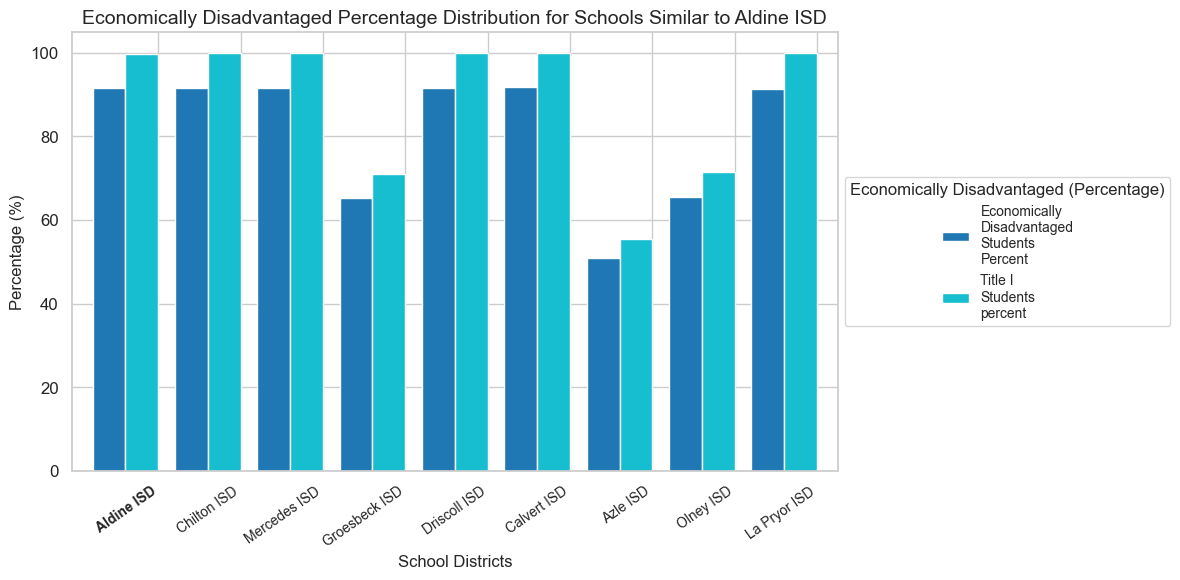

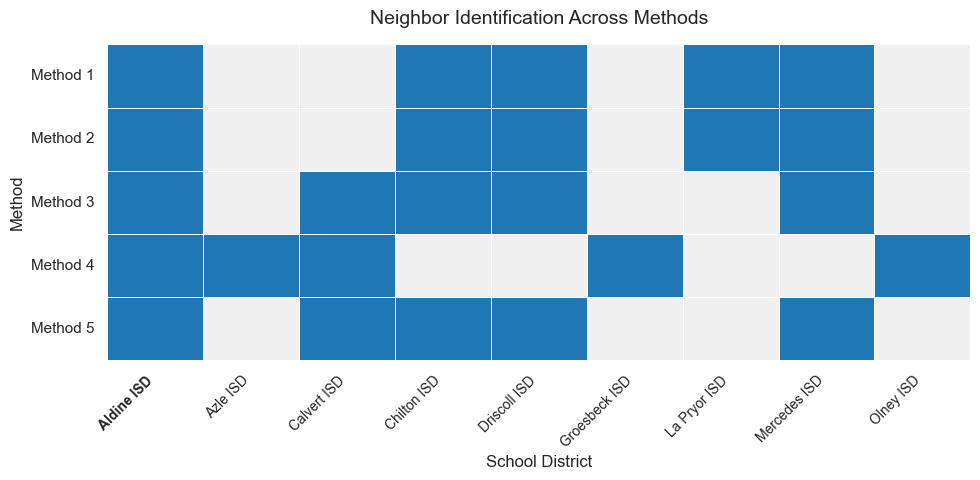

DISTNAME,Aldine ISD,Azle ISD,Calvert ISD,Chilton ISD,Driscoll ISD,Groesbeck ISD,La Pryor ISD,Mercedes ISD,Olney ISD
metric,,,,,,,,,
Method 1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
Method 2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
Method 3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
Method 4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Method 5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [33]:
from KNN_Diagnostic_Plots import plot_economically_disadvantaged_side_by_side
from compareNeighbors import plot_demographic_feature_presence2
econ_dis = comparePlotter(AldineISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)
econ_dis
plot_demographic_feature_presence2(econ_dis, AldineISD)

## Student Race and Ethnicity

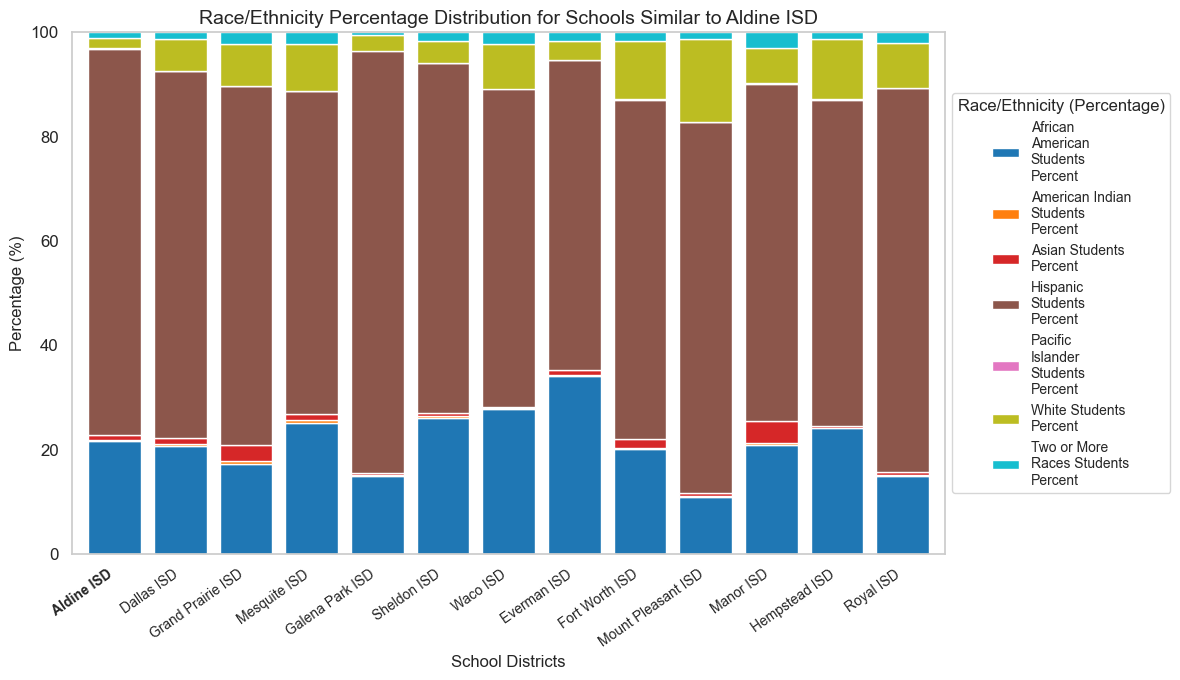

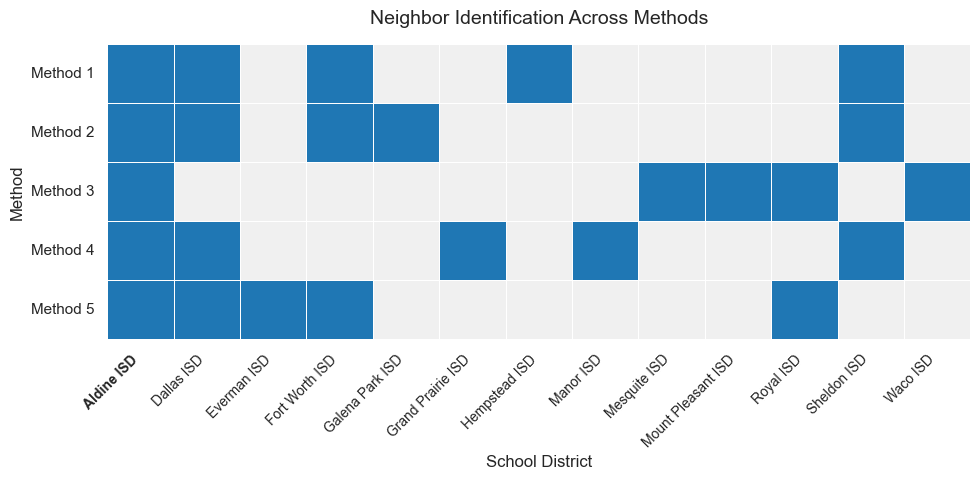

DISTNAME,Aldine ISD,Dallas ISD,Everman ISD,Fort Worth ISD,Galena Park ISD,Grand Prairie ISD,Hempstead ISD,Manor ISD,Mesquite ISD,Mount Pleasant ISD,Royal ISD,Sheldon ISD,Waco ISD
metric,,,,,,,,,,,,,
Method 1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Method 2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Method 3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
Method 4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Method 5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
from KNN_Diagnostic_Plots import plot_race_ethnicity_stacked_bar
re = comparePlotter(AldineISD, plot_func = plot_race_ethnicity_stacked_bar, df = df, selected_features = race_ethnicity_percent)
re
plot_demographic_feature_presence2(re, AldineISD)

## Special Education and 504 Students

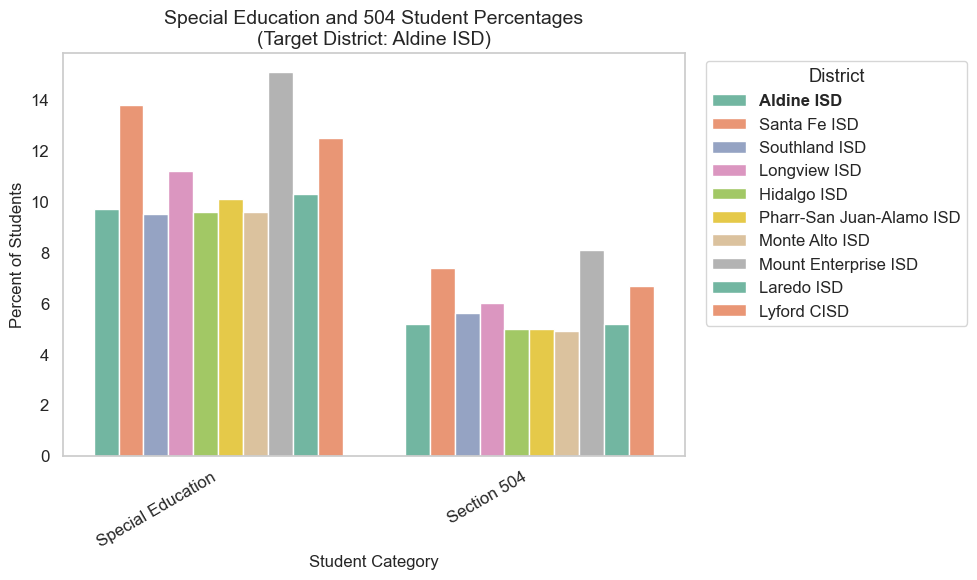

,DISTRICT_id,DISTNAME,metric
524,101902,ALDINE ISD,Method 1
579,108905,HIDALGO ISD,Method 1
589,108915,MONTE ALTO ISD,Method 1
426,85903,SOUTHLAND ISD,Method 1
583,108909,PHARR-SAN JUAN-ALAMO ISD,Method 1
524,101902,ALDINE ISD,Method 2
579,108905,HIDALGO ISD,Method 2
589,108915,MONTE ALTO ISD,Method 2
426,85903,SOUTHLAND ISD,Method 2
583,108909,PHARR-SAN JUAN-ALAMO ISD,Method 2


In [35]:
from KNN_Diagnostic_Plots import plot_special_ed_504_bar
comparePlotter(AldineISD, plot_func = plot_special_ed_504_bar, df = df, selected_features = special_ed_504)

## Student-Teacher Ratio

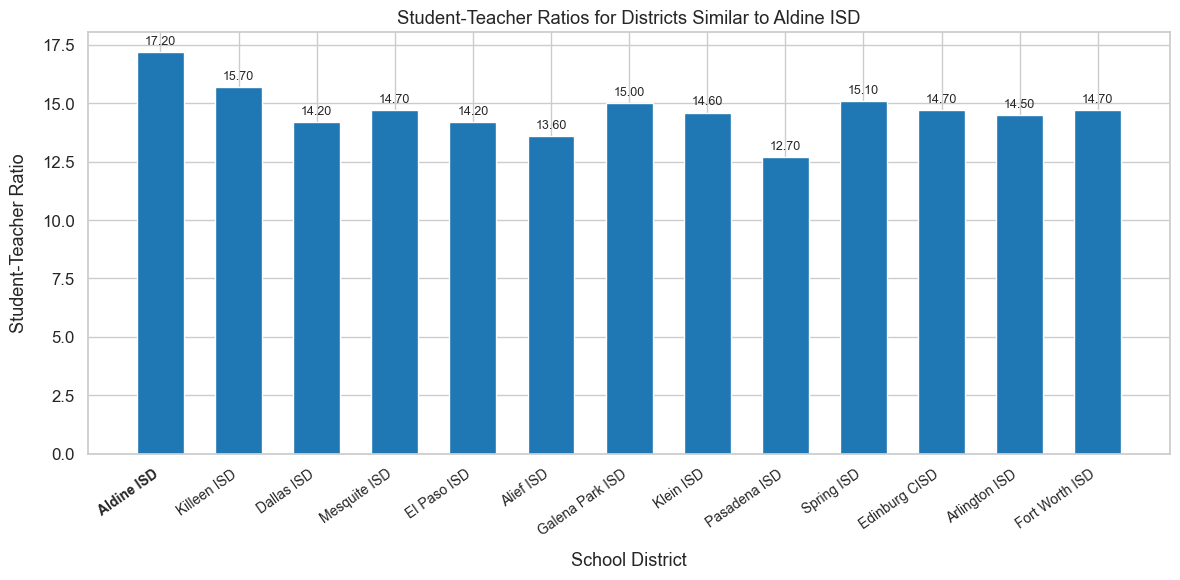

In [36]:
student_teacher_ratio_plot = comparePlotter(district_id = AldineISD, plot_func = plot_student_teacher_ratio_bars, df = df, selected_features= gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Staff/Student Count

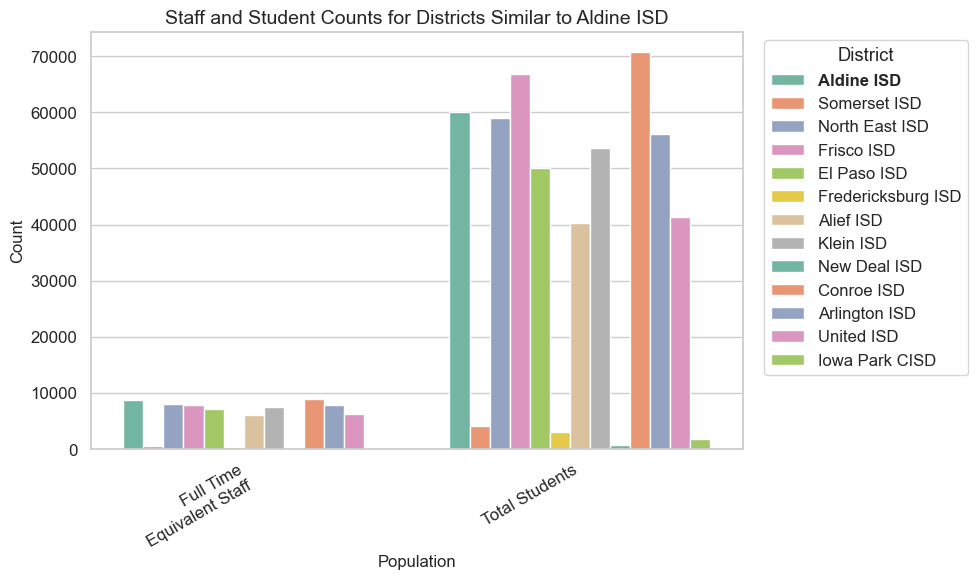

In [37]:
student_staff_count_plot = comparePlotter(district_id =  AldineISD, plot_func = plot_student_staff_counts, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = staff_count + student_count)

## Race/Ethnicity

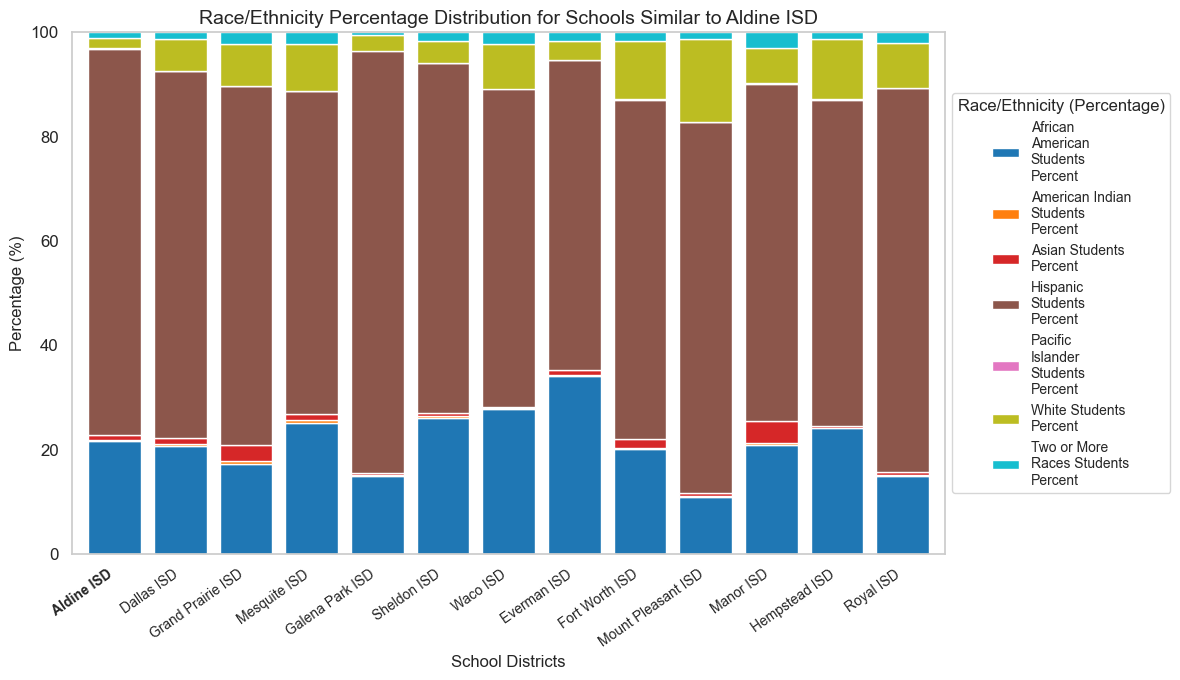

In [38]:
race_ethnicity_plot = comparePlotter(AldineISD, plot_func = plot_race_ethnicity_stacked_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = race_ethnicity_percent)

## Special Populations

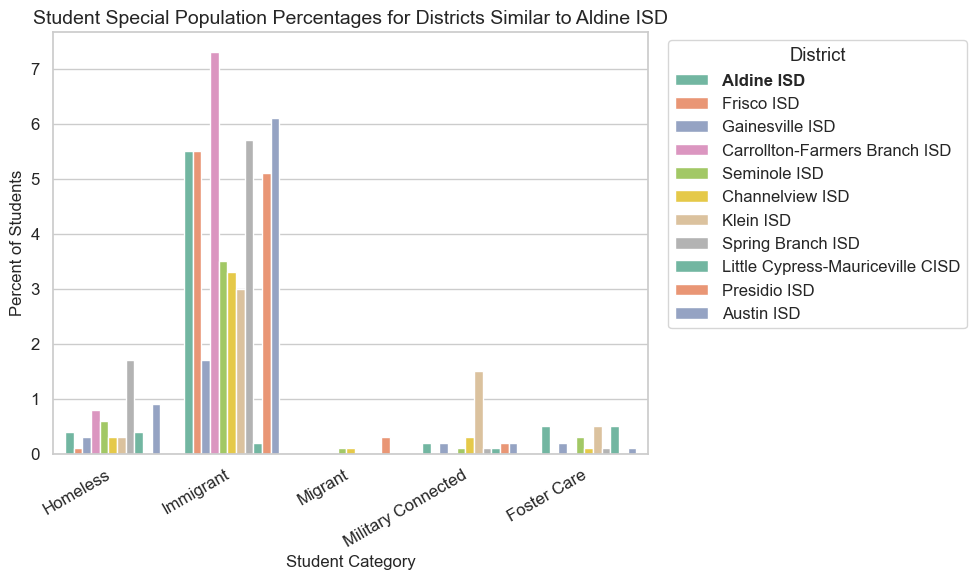

In [39]:
import matplotlib.pyplot as plt

special_populations_plot = comparePlotter(AldineISD, plot_func = plot_special_populations_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = special_populations_percent)

## Special Education and 504

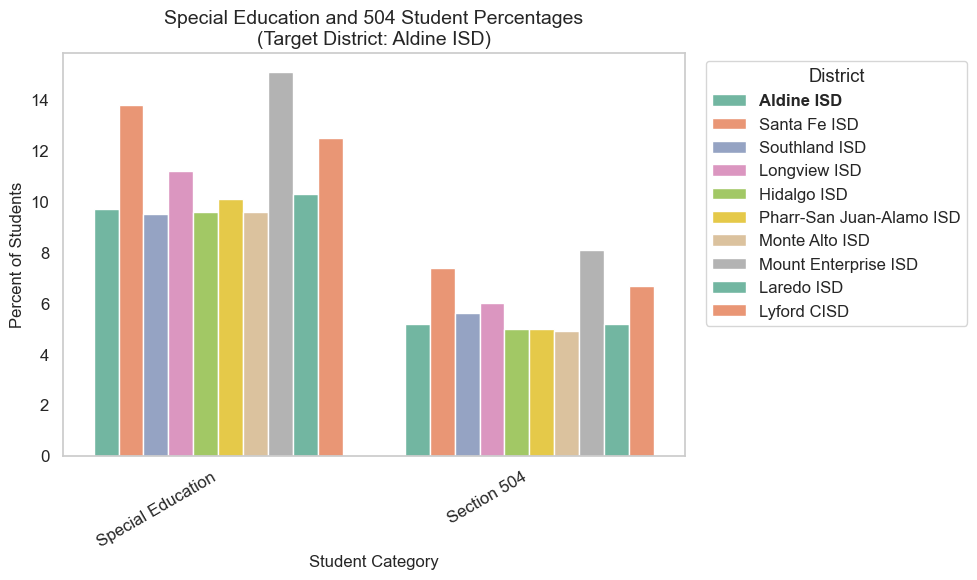

In [40]:
plot_special_ed_504_plot = comparePlotter(AldineISD, plot_func = plot_special_ed_504_bar, df = df, selected_features = special_ed_504)

## Gifted and Talented

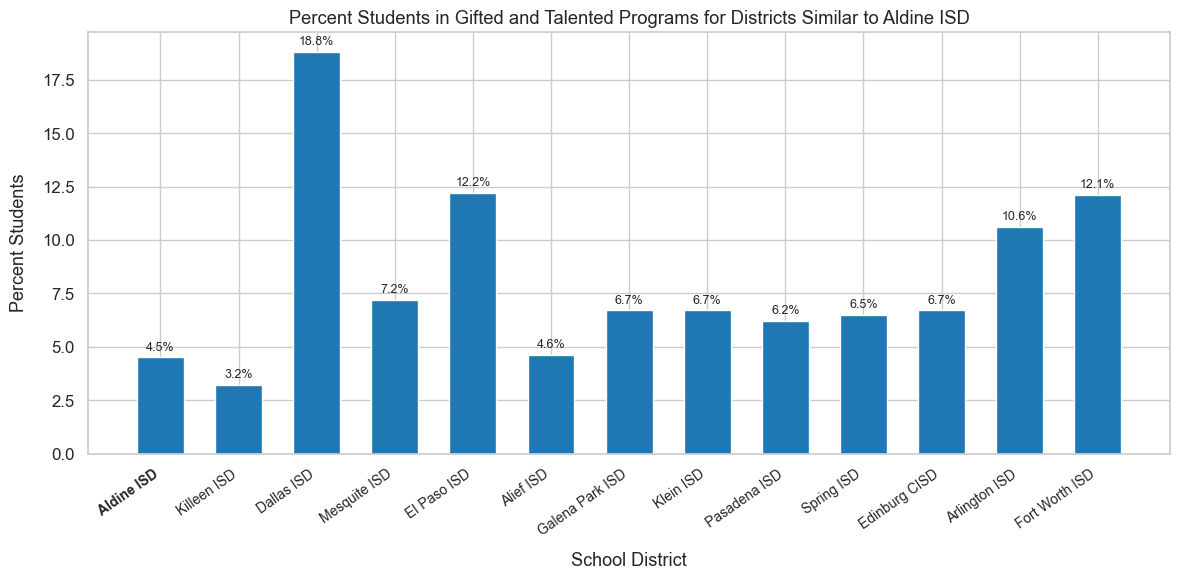

In [41]:
gifted_talented_plot = comparePlotter(AldineISD, plot_func = plot_gifted_talented_bars, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Bilingual and Language Education

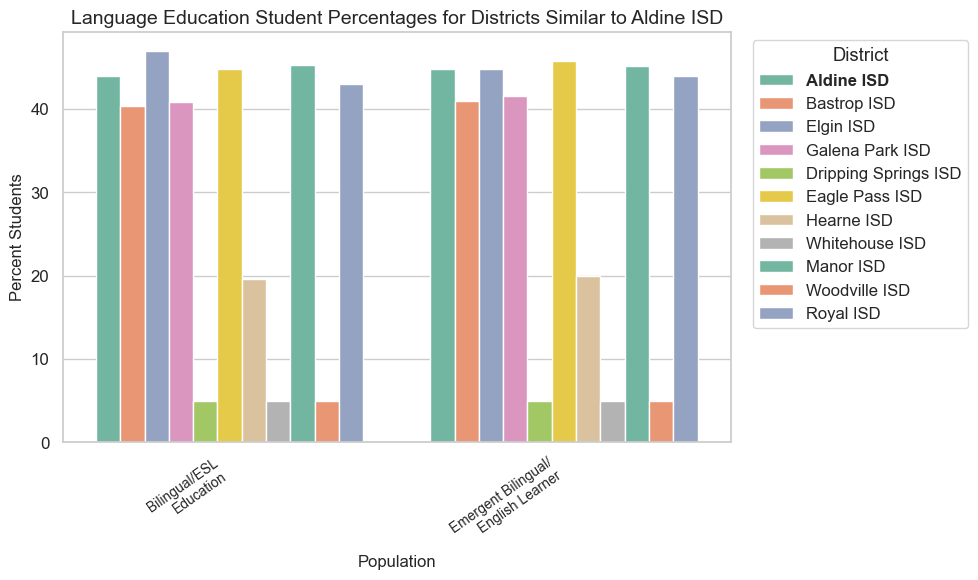

In [42]:
language_education_plot = comparePlotter(AldineISD, plot_func = plot_language_education_bars, df = df, selected_features = language_education_percent)

## Economically Disadvantaged

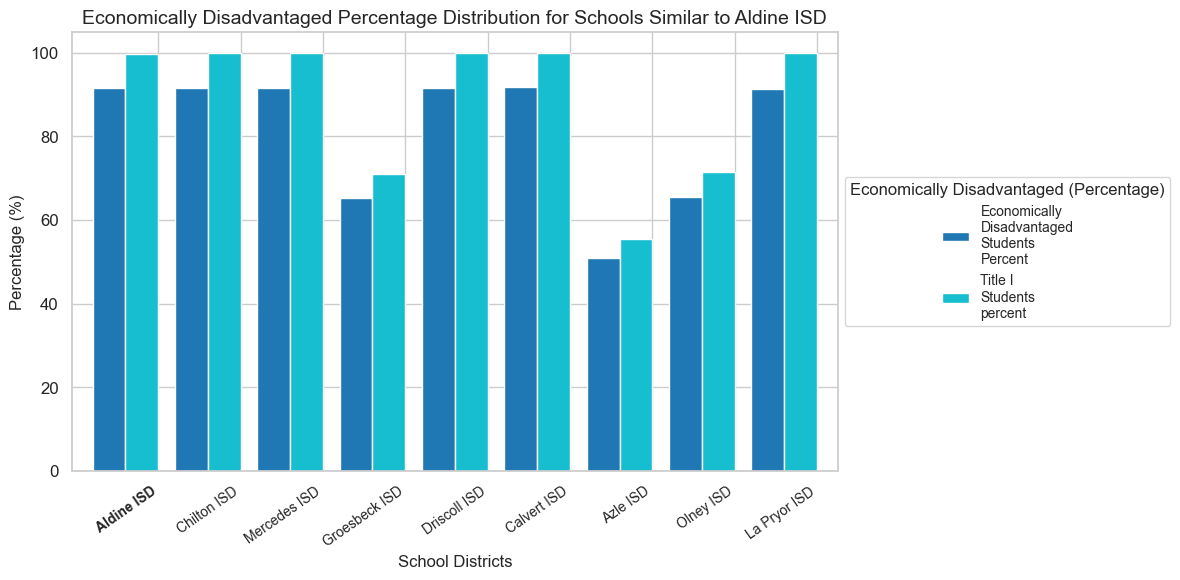

In [43]:
econ_disadv_plot = comparePlotter(AldineISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)

# Example of Distance-Based Mechanism

In [17]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = [economically_disadvantaged[0], race_ethnicity_percent[3]])

example_data = df[df['DISTRICT_id'].isin(neighbors['DISTRICT_id'])]

example_data = example_data[['DISTNAME', 'DISTRICT_id', economically_disadvantaged[0], race_ethnicity_percent[3]]]

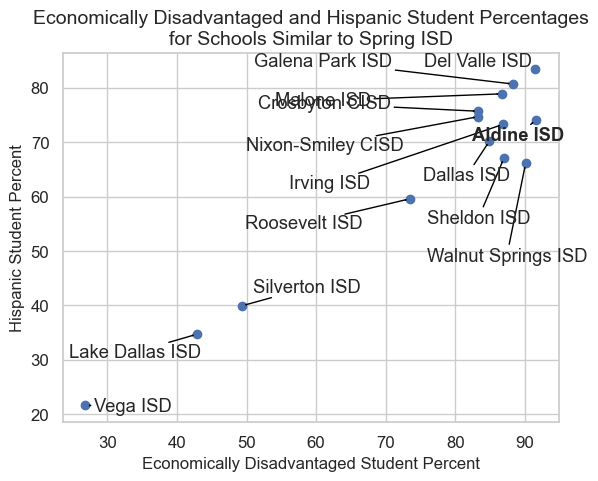

In [27]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from KNN_Diagnostic_Plots import title_case_with_spaces

x = example_data[economically_disadvantaged[0]].reset_index(drop=True)
y = example_data[race_ethnicity_percent[3]].reset_index(drop=True)
l = [title_case_with_spaces(label) for label in example_data['DISTNAME'].reset_index(drop=True)]

fig, ax = plt.subplots()
ax.scatter(x, y)

texts = [ax.text(x[i], y[i], l[i], ha='center', va='center') for i in range(len(l))]

# Apply bold to the labels that match the condition
for text in texts:
    if 'Aldine ISD'.lower() in text.get_text().lower():
        text.set_fontweight('bold')

adjust_text(texts, expand=(1.2, 2), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle='->', color='black') # ensure the labeling is clear by adding arrows
            );
plt.title(f"Economically Disadvantaged and Hispanic Student Percentages\nfor Schools Similar to Spring ISD", fontsize=14)
plt.xlabel("Economically Disadvantaged Student Percent", fontsize=12)
plt.ylabel("Hispanic Student Percent", fontsize=12)
plt.show()


## Neighbors, All Buckets

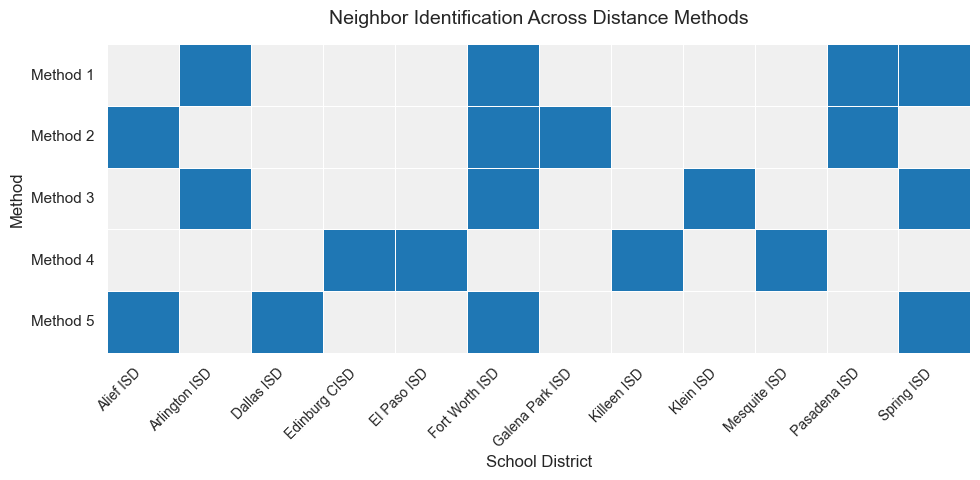

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#all buckets
neighbors = compareMetrics(AldineISD, df = df, selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Race Ethnicity

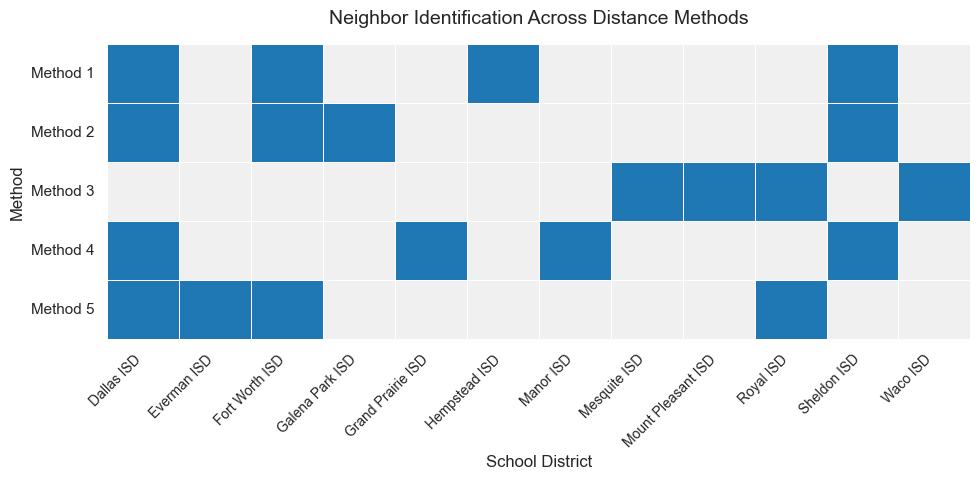

In [20]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = race_ethnicity_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Econ Disadv

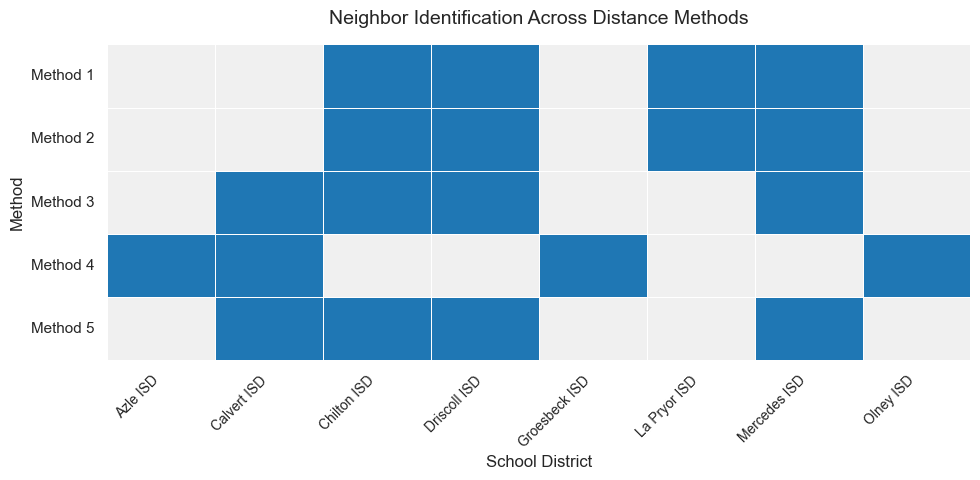

In [21]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = economically_disadvantaged)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Education

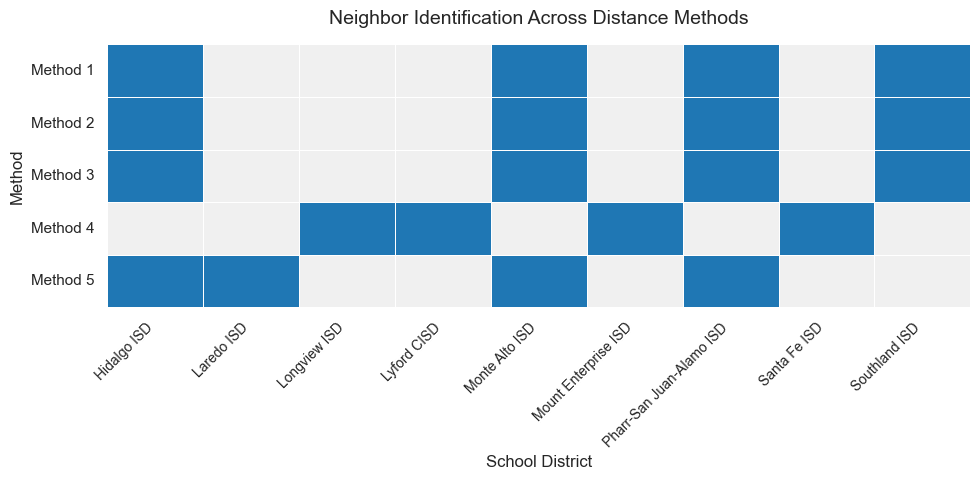

In [22]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = special_ed_504)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Populations

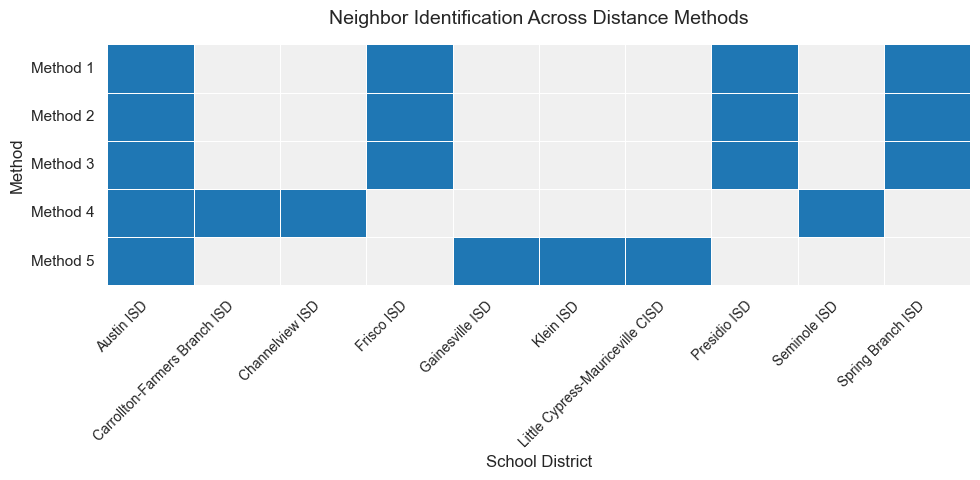

In [23]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = special_populations_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Staff Student Counts

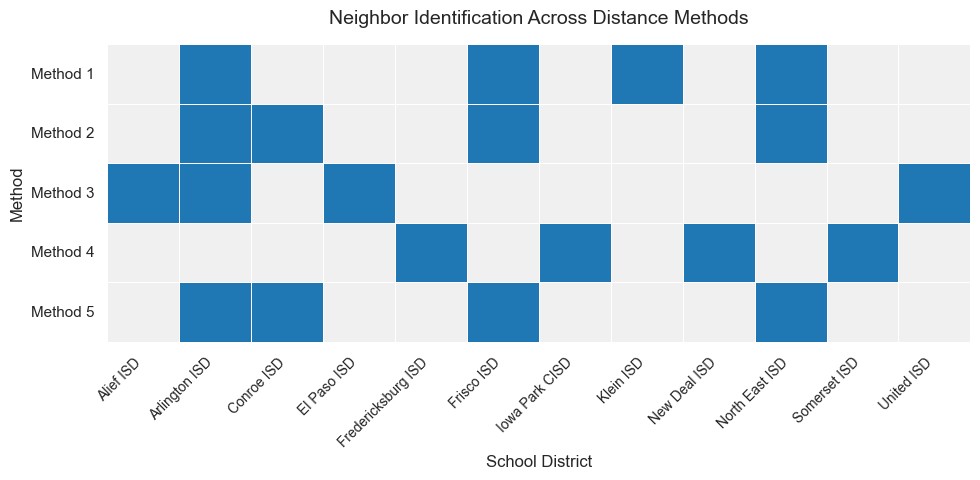

In [24]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = staff_count + student_count)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Language Ed

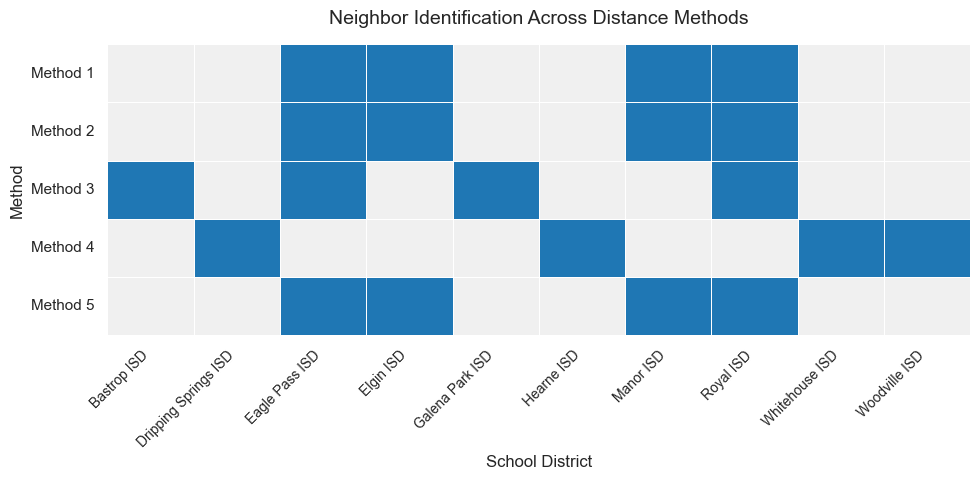

In [25]:
neighbors = compareMetrics(AldineISD, df = df, selected_features = language_education_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != AldineISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [26]:
## check data
from KNN_Model import get_neighbor_data

get_neighbor_data(df, economically_disadvantaged, all_neighbors)

,DISTRICT_id,TEA District Type,TEA Description,NCES District Type,NCES Description,Charter School (Y/N),COUNTY,REGION,DISTRICT,DISTNAME_x,CNTYNAME,DFLCHART,DFLALTED,ASVAB_STATUS,District 2022-23 Economically Disadvantaged Students Percent,District 2022-23 Title I Students percent,DISTNAME_y,metric
0,57905,A,Major Urban,11,City-Large,N,'057,'10,'057905,DALLAS ISD,DALLAS,N,N,,84.9,96.7,DALLAS ISD,Method 1
1,57905,A,Major Urban,11,City-Large,N,'057,'10,'057905,DALLAS ISD,DALLAS,N,N,,84.9,96.7,DALLAS ISD,Method 2
2,57905,A,Major Urban,11,City-Large,N,'057,'10,'057905,DALLAS ISD,DALLAS,N,N,,84.9,96.7,DALLAS ISD,Method 4
3,57905,A,Major Urban,11,City-Large,N,'057,'10,'057905,DALLAS ISD,DALLAS,N,N,,84.9,96.7,DALLAS ISD,Method 5
4,57910,B,Major Suburban,21,Suburb-Large,N,'057,'10,'057910,GRAND PRAIRIE ISD,DALLAS,N,N,,75.4,68.9,GRAND PRAIRIE ISD,Method 4
5,101902,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101902,ALDINE ISD,HARRIS,N,N,,91.6,99.8,ALDINE ISD,Method 1
6,101902,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101902,ALDINE ISD,HARRIS,N,N,,91.6,99.8,ALDINE ISD,Method 2
7,101902,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101902,ALDINE ISD,HARRIS,N,N,,91.6,99.8,ALDINE ISD,Method 3
8,101902,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101902,ALDINE ISD,HARRIS,N,N,,91.6,99.8,ALDINE ISD,Method 4
9,101902,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101902,ALDINE ISD,HARRIS,N,N,,91.6,99.8,ALDINE ISD,Method 5
